In [1]:
import illustrisAPI.data as iApi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import h5py
%load_ext autoreload
%autoreload 2

In [90]:
#returns a dictionary with all halo catalog data corresponding to a particular halo
def getHaloData(whichHalo, simulation='Illustris-1', snapshot=135):
    url='http://www.illustris-project.org/api/'+simulation+'/snapshots/'+str(snapshot)+'/halos/'+str(whichHalo)+'/info.json'
    data=iApi.get(url)
    haloData=data['Group']
    return haloData
#returns a dictionary with all subhalo catalog data corresponding to a particular subhalo, plus progenitors!
def getSubhaloData(whichSubhalo, simulation='Illustris-1', snapshot=135):
    infoUrl='http://www.illustris-project.org/api/'+simulation+'/snapshots/'+str(snapshot)+'/subhalos/'+str(whichSubhalo)+'/info.json'
    infoData=iApi.get(infoUrl)
    subhaloData=infoData['Subhalo']
    subUrl='http://www.illustris-project.org/api/'+simulation+'/snapshots/'+str(snapshot)+'/subhalos/'+str(whichSubhalo)
    subData=iApi.get(subUrl)
    treeUrl='http://www.illustris-project.org/api/'+simulation+'/snapshots/'+str(snapshot)+'/subhalos/'+str(whichSubhalo)+'/sublink/mpb.hdf5'
    treeData=iApi.get(treeUrl)
    print(treeData)
    return treeData
data=getSubhaloData(0,snapshot=134)

temp.hdf5


In [91]:
f = h5py.File(data,'r')
print(list(f.keys()))
print(f['SubfindID'][:])
print(f['SnapNum'][:])

['DescendantID', 'FirstProgenitorID', 'FirstSubhaloInFOFGroupID', 'Group_M_Crit200', 'Group_M_Mean200', 'Group_M_TopHat200', 'LastProgenitorID', 'MainLeafProgenitorID', 'Mass', 'MassHistory', 'NextProgenitorID', 'NextSubhaloInFOFGroupID', 'NumParticles', 'RootDescendantID', 'SnapNum', 'SubfindID', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloCM', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloID', 'SubhaloIDMostbound', 'SubhaloIDRaw', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetallicity', 'SubhaloStarMetallicityHal

In [8]:
alt=iApi.get('http://www.illustris-project.org/api/Illustris-1/snapshots/134/subhalos/1/sublink/mpb.hdf5',warningSize=1)
f=h5py.File(alt,'r')
print(f['SubfindID'][:])
print(f['SnapNum'][:])

{'Content-Type': 'application/json', 'Connection': 'Keep-Alive', 'Transfer-Encoding': 'chunked', 'Vary': 'Accept,Cookie', 'Date': 'Fri, 28 Jul 2017 12:38:01 GMT', 'Allow': 'GET, HEAD, OPTIONS', 'X-Frame-Options': 'SAMEORIGIN', 'Server': 'Apache/2.2.15 (CentOS)', 'Keep-Alive': 'timeout=2, max=200'}


KeyError: 'content-length'

In [4]:
#example of getting subhalo data from z=1 in illustris 3
haloFirstSub=iApi.getHaloField('GroupFirstSub',snapshot=85,simulation='Illustris-3')
haloMass=iApi.getHaloField('GroupMass',snapshot=85,simulation='Illustris-3')
subVelDisp=iApi.getSubhaloField('SubhaloVelDisp',snapshot=85,simulation='Illustris-3')
subBhMass=iApi.getSubhaloField('SubhaloBHMass',snapshot=85,simulation='Illustris-3')

/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/matplotlib/scale.py:103: RuntimeWarning: divide by zero encountered in log
  return np.divide(np.log(a, out=a), np.log(self.base), out=a)


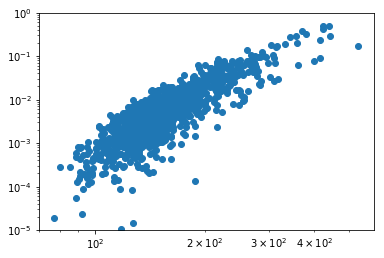

In [5]:
#example plots of stellar component of the black hole sigma relation for central galaxies
bigGalaxies=np.argwhere(haloMass>100)
mSigma=plt.gca()
mSigma.scatter(subVelDisp[haloFirstSub[bigGalaxies]],subBhMass[haloFirstSub[bigGalaxies]])
mSigma.set_yscale('log')
mSigma.set_xscale('log')
mSigma.set_ylim(1e-5,1)
plt.show()

In [2]:
#example of getting data from a particular galaxy (from online)
fields=[
    [4,'Coordinates'],
    [4,'Velocities'],
    [4,'Masses']
]
data=iApi.getGalaxy(150,fields)
rStar=data[0][:,:]
vStar=data[1][:,:]
mStar=data[2][:]

TypeError: getGalaxy() got an unexpected keyword argument 'warningSize'

/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:46: RuntimeWarning: divide by zero encountered in log


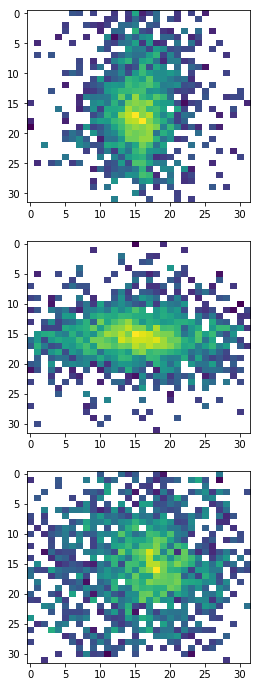

In [40]:
#example plots of stellar component of the galaxy
fig = plt.figure(figsize=(4,12))
grid=matplotlib.gridspec.GridSpec(3,1)
#moves to center of mass frame
com=findCenterMass(rStar,mStar)
rStar=rStar-com
vom=findCenterVelocity(vStar,mStar)
vStar=vStar-vom
#reorients with z-axis along direction of galaxy angular momentum
jUnit=findPlane(rStar,vStar)
rStar=projectPos(jUnit,rStar)
vStar=projectPos(jUnit,vStar)
#plot map of projected density
nPixels=32
edgeDist=10
plotMap(rStar,mStar,mStar,nPixels,edgeDist,grid,0,0,useMean=0,projection=0)
plotMap(rStar,mStar,mStar,nPixels,edgeDist,grid,0,1,useMean=0,projection=1)
plotMap(rStar,mStar,mStar,nPixels,edgeDist,grid,0,2,useMean=0)
plt.show()

In [15]:
# routines used for plotting and data handling in the examples
def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com
def findCenterVelocity(vStar,mStar):
    vom=np.zeros(3)
    for i in range(3):
        vom[i]=np.sum(vStar[:,i]*mStar[:])/np.sum(mStar[:])
    return vom
def findPlane(rStar,vStar):
    jStar=np.cross(rStar,vStar)
    j=np.sum(jStar,axis=0)
    j=j/np.linalg.norm(j)
    return j
def projectPos(j,r):
    z=j[0]*r[:,0]+j[1]*r[:,1]+j[2]*r[:,2]
    n=np.array([0,-j[2],j[1]])
    n=n/np.linalg.norm(n)
    m=np.cross(j,n)
    x=n[0]*r[:,0]+n[1]*r[:,1]+n[2]*r[:,2]
    y=m[0]*r[:,0]+m[1]*r[:,1]+m[2]*r[:,2]
    return np.vstack((x,y,z)).T
def findMap(r,m,data,nPixels,edgeDist,mean=1,projectAxis=2):
    pixels=np.zeros((nPixels,nPixels))
    vertAxis=(projectAxis+1)%3
    horzAxis=(projectAxis+2)%3
    for i in range(nPixels):
        for j in range(nPixels):
            inPix=np.argwhere((edgeDist*(((2*i)/nPixels)-1)<r[:,vertAxis])
                            &(edgeDist*(((2*j)/nPixels)-1)<r[:,horzAxis])
                         &(edgeDist*(((2*(i+1))/nPixels)-1)>r[:,vertAxis])
                         &(edgeDist*(((2*(j+1))/nPixels)-1)>r[:,horzAxis]))
            if inPix.size==0:
                continue
            if mean==1: #return the mass weighted mean
                pixels[i,j]=np.sum(data[inPix]*m[inPix])/np.sum(m[inPix])
            if mean==0:
                pixels[i,j]=np.sum(data[inPix])
    return pixels
def plotMap(r,m,data,nPixels,edgeDist,grid,iPlot,jPlot,logPlot=1,useMean=1,projection=2):
    pixels = findMap(r,m,data,nPixels,edgeDist,mean=useMean,projectAxis=projection)
    plot = plt.subplot(grid[jPlot,iPlot])
    if logPlot==1:
        plot.imshow(np.log(pixels), interpolation ='none', aspect = 'auto')
    else:
        plot.imshow(pixels, interpolation ='none', aspect = 'auto')